## 기본 딥러닝 코드
### 판단 문제
- 표현층의 activation 함수는 sigmoid / 나머지는 relu
- loss 함수는 binary_crossentropy

In [35]:
######################################
# 유방암 판단 문제
######################################

import matplotlib.pyplot as plt
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import time

In [36]:
# 1. 데이터셋 생성
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1, test_size=0.25)

In [37]:
# 2. 모델 정의 구성
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# 3. 모델 학습 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# 4. 모델 학습시키기
start = time.time()

ret = model.fit(x_train, y_train, batch_size=25, epochs=200,
                validation_split=0.1, verbose=1)

print("time: ", (time.time() - start))

Epoch 1/200
16/16 [==============================] - 0s 6ms/step - loss: 21.5987 - accuracy: 0.4099 - val_loss: 4.6571 - val_accuracy: 0.6744
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 1.5498 - accuracy: 0.6527 - val_loss: 0.3832 - val_accuracy: 0.9302
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.8773 - val_loss: 0.3658 - val_accuracy: 0.8837
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.9034 - val_loss: 0.3677 - val_accuracy: 0.8837
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.9086 - val_loss: 0.3452 - val_accuracy: 0.8837
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.9112 - val_loss: 0.3428 - val_accuracy: 0.8605
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9034 - val_loss: 0.3512 - val_accuracy: 0.8605
Epoch 8/200


#### 모델 평가

In [40]:
# 학습 후 metrics=['accuracy']에 대해 결과를 시각화 한다.
print(ret.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


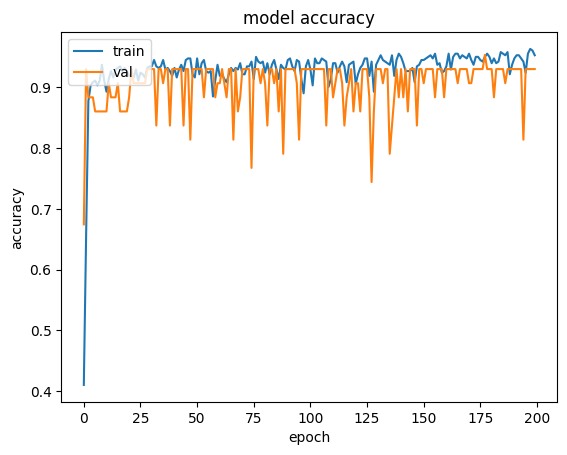

In [41]:
# train, val에 대하 ㄴ정확도 그래프
plt.plot(ret.history['accuracy'])
plt.plot(ret.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

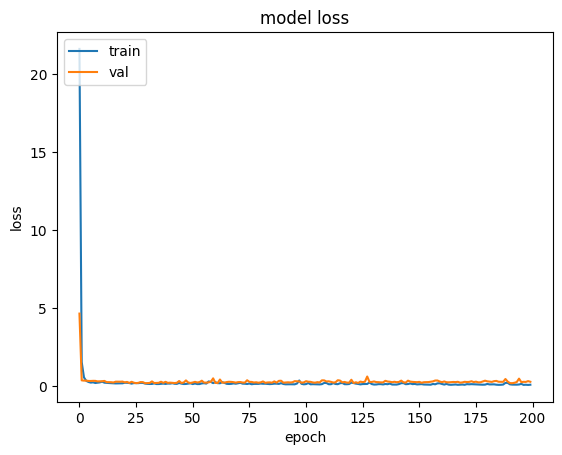

In [42]:
# train, val에 대한 loss 정도를 그래프로 살펴보기
plt.plot(ret.history['loss'])
plt.plot(ret.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
# 5. 모델 평가하기
score = model.evaluate(x_test, y_test)
print('Test Score:', score)

5/5 [==============================] - 0s 668us/step - loss: 0.1804 - accuracy: 0.9301
Test Score: [0.18037837743759155, 0.9300699234008789]


In [44]:
# 6. 모델을 사용하여 예측해보기
y_predict = model.predict(x_test)
y_predict_class = np.argmax(y_predict, axis=1)
y_result = np.zeros(y_test.size)
for i in range(y_test.size):
    y_result[i]=y_test[i] - y_predict_class[i]
raw_data = {'정답': y_test,
            '예측': y_predict_class,
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))

5/5 [==============================] - 0s 613us/step
+-----+--------+--------+--------+
|     |   정답 |   예측 |   차이 |
|-----+--------+--------+--------|
|   0 |      1 |      0 |      1 |
|   1 |      0 |      0 |      0 |
|   2 |      1 |      0 |      1 |
|   3 |      0 |      0 |      0 |
|   4 |      0 |      0 |      0 |
|   5 |      0 |      0 |      0 |
|   6 |      0 |      0 |      0 |
|   7 |      0 |      0 |      0 |
|   8 |      1 |      0 |      1 |
|   9 |      1 |      0 |      1 |
|  10 |      1 |      0 |      1 |
|  11 |      0 |      0 |      0 |
|  12 |      0 |      0 |      0 |
|  13 |      1 |      0 |      1 |
|  14 |      1 |      0 |      1 |
|  15 |      1 |      0 |      1 |
|  16 |      1 |      0 |      1 |
|  17 |      1 |      0 |      1 |
|  18 |      1 |      0 |      1 |
|  19 |      0 |      0 |      0 |
|  20 |      1 |      0 |      1 |
|  21 |      1 |      0 |      1 |
|  22 |      0 |      0 |      0 |
|  23 |      1 |      0 |      1 |
|  24 | 

### 회귀 문제
- 출력 층의 퍼셉트론 수는 1 개.

In [14]:
######################################
# 당뇨병 회귀 문제
######################################

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
from pandas import Series, DataFrame
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import time

In [7]:
# 1. 데이터셋 생성
diabetes = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    random_state=1, test_size=0.25)

In [8]:
# 2. 모델 정의 구성
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1)) # 최종 출력 1: 회귀 분석이므로

In [9]:
# 3. 모델 학습 설정
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [10]:
# 4. 모델 학습시키기
start = time.time()

ret = model.fit(x_train, y_train, batch_size=20, epochs=500,
                validation_split=0.1, verbose=1)

print("time: ", (time.time() - start))

Epoch 1/500
15/15 [==============================] - 0s 5ms/step - loss: 152.5510 - mae: 152.5510 - val_loss: 162.5280 - val_mae: 162.5280
Epoch 2/500
15/15 [==============================] - 0s 1ms/step - loss: 152.4626 - mae: 152.4626 - val_loss: 162.4300 - val_mae: 162.4300
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 152.3536 - mae: 152.3536 - val_loss: 162.3098 - val_mae: 162.3098
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 152.2191 - mae: 152.2191 - val_loss: 162.1582 - val_mae: 162.1582
Epoch 5/500
15/15 [==============================] - 0s 1ms/step - loss: 152.0506 - mae: 152.0506 - val_loss: 161.9704 - val_mae: 161.9704
Epoch 6/500
15/15 [==============================] - 0s 1ms/step - loss: 151.8428 - mae: 151.8428 - val_loss: 161.7392 - val_mae: 161.7391
Epoch 7/500
15/15 [==============================] - 0s 1ms/step - loss: 151.5886 - mae: 151.5886 - val_loss: 161.4572 - val_mae: 161.4572
Epoch 8/500
15/15 [========

#### 모델 평가

In [11]:
# 학습 후 metrics=['mae']에 대해 결과를 시각화 한다.
print(ret.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


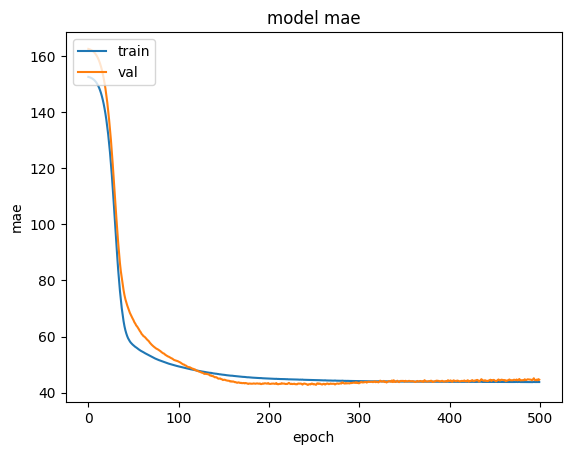

In [12]:
# train, val에 대하 ㄴ정확도 그래프
plt.plot(ret.history['mae'])
plt.plot(ret.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
# 5. 모델 평가하기
score = model.evaluate(x_test, y_test)
print("Test Score: ", score)

4/4 [==============================] - 0s 3ms/step - loss: 42.6468 - mae: 42.6468
Test Score:  [42.64680862426758, 42.64680862426758]


In [17]:
# 6. 모델을 사용하여 예측해보기
y_predict = model.predict(x_test)
y_result = np.zeros(y_test.size)
for i in range(y_test.size):
    y_result[i]=y_test[i] - y_predict[i]
raw_data = {'정답': y_test,
            '예측': y_predict[:, 0],
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))

4/4 [==============================] - 0s 0s/step
+-----+--------+----------+------------+
|     |   정답 |     예측 |       차이 |
|-----+--------+----------+------------|
|   0 |     78 | 106.313  |  -28.3135  |
|   1 |    152 | 115.008  |   36.9921  |
|   2 |    200 | 198.058  |    1.94197 |
|   3 |     59 |  71.0136 |  -12.0136  |
|   4 |    311 | 164.354  |  146.646   |
|   5 |    178 | 187.199  |   -9.1985  |
|   6 |    332 | 212.598  |  119.402   |
|   7 |    132 | 126.26   |    5.74001 |
|   8 |    156 | 159.683  |   -3.68268 |
|   9 |    135 | 139.909  |   -4.90877 |
|  10 |    220 | 211.951  |    8.04857 |
|  11 |    233 | 199.695  |   33.3046  |
|  12 |     91 |  87.0461 |    3.95394 |
|  13 |     51 |  65.8218 |  -14.8218  |
|  14 |    195 | 243.845  |  -48.8448  |
|  15 |    109 | 215.952  | -106.952   |
|  16 |    217 | 172.752  |   44.2483  |
|  17 |     94 | 102.339  |   -8.33867 |
|  18 |     89 | 109.918  |  -20.9176  |
|  19 |    111 | 158.521  |  -47.5209  |
|  20 |    12

C:\Users\USER\AppData\Local\Temp\ipykernel_20316\2838495860.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_result[i]=y_test[i] - y_predict[i]


### 분류 문제(클래스 3 이상)
- 출력 층의 활성 함수는 softmax를 많이 사용
- 출력 층 퍼셉트론 수는 타겟의 클래스 수 만큼

In [18]:
######################################
# 붓꽃 분류 문제
######################################

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import time

In [19]:
# 1. 데이터셋 생성
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=66, test_size=0.25)

In [20]:
# 2. 모델 정의 구성
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax')) # 붓꽃 종류는 3 가지, activation 함수는 softmax

In [21]:
# 3. 모델 학습 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [22]:
# 4. 모델 학습시키기
start = time.time()

ret=model.fit(x_train, y_train,batch_size=30,epochs=500, validation_split=0.2)

print("time: ", (time.time() - start))

Epoch 1/500
3/3 [==============================] - 0s 42ms/step - loss: 1.0784 - accuracy: 0.3596 - val_loss: 1.0952 - val_accuracy: 0.2609
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 1.0664 - accuracy: 0.3596 - val_loss: 1.0890 - val_accuracy: 0.2609
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0591 - accuracy: 0.3596 - val_loss: 1.0840 - val_accuracy: 0.2609
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 1.0522 - accuracy: 0.3596 - val_loss: 1.0792 - val_accuracy: 0.2609
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 1.0446 - accuracy: 0.3596 - val_loss: 1.0751 - val_accuracy: 0.2609
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 1.0366 - accuracy: 0.3596 - val_loss: 1.0686 - val_accuracy: 0.2609
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0278 - accuracy: 0.3596 - val_loss: 1.0623 - val_accuracy: 0.2609
Epoch 8/500
3/3 [=========

#### 모델 평가하기

In [23]:
# 학습 후 metrics=['accuracy']에 대해 결과를 시각화 한다.
print(ret.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


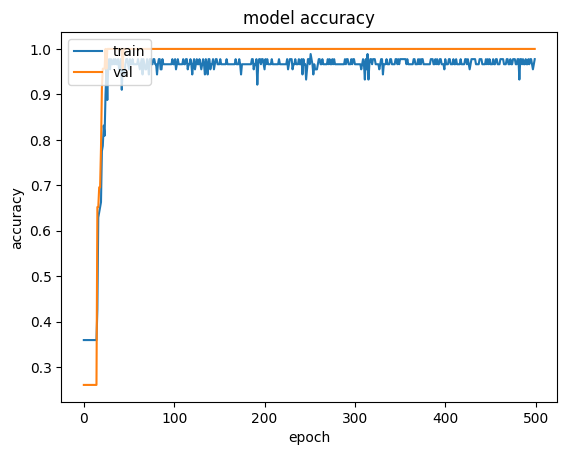

In [24]:
# train, val에 대하 ㄴ정확도 그래프
plt.plot(ret.history['accuracy'])
plt.plot(ret.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

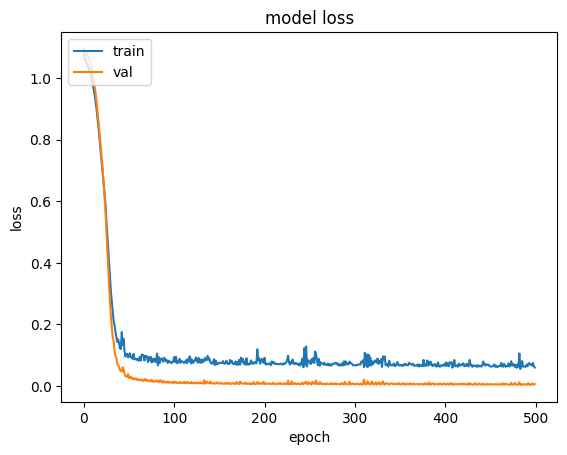

In [25]:
# train, val에 대한 loss 정도를 그래프로 살펴보기
plt.plot(ret.history['loss'])
plt.plot(ret.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
# 5. 모델 평가하기
score = model.evaluate(x_test, y_test)
print("Test Score", score)

2/2 [==============================] - 0s 0s/step - loss: 0.0626 - accuracy: 1.0000
Test Score [0.06263603270053864, 1.0]


In [34]:
# 6. 모델을 사용하여 예측해보기
y_predict = model.predict(x_test)
y_predict_class = np.argmax(y_predict, axis=1)
y_result = np.zeros(y_test.size)
for i in range(y_test.size):
    y_result[i]=y_test[i] - y_predict_class[i]
raw_data = {'정답': y_test,
            '예측': y_predict_class,
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))

2/2 [==============================] - 0s 0s/step
+----+--------+--------+--------+
|    |   정답 |   예측 |   차이 |
|----+--------+--------+--------|
|  0 |      1 |      1 |      0 |
|  1 |      1 |      1 |      0 |
|  2 |      1 |      1 |      0 |
|  3 |      0 |      0 |      0 |
|  4 |      1 |      1 |      0 |
|  5 |      1 |      1 |      0 |
|  6 |      0 |      0 |      0 |
|  7 |      0 |      0 |      0 |
|  8 |      0 |      0 |      0 |
|  9 |      2 |      2 |      0 |
| 10 |      2 |      2 |      0 |
| 11 |      2 |      2 |      0 |
| 12 |      0 |      0 |      0 |
| 13 |      2 |      2 |      0 |
| 14 |      2 |      2 |      0 |
| 15 |      0 |      0 |      0 |
| 16 |      1 |      1 |      0 |
| 17 |      1 |      1 |      0 |
| 18 |      2 |      2 |      0 |
| 19 |      2 |      2 |      0 |
| 20 |      0 |      0 |      0 |
| 21 |      1 |      1 |      0 |
| 22 |      1 |      1 |      0 |
| 23 |      2 |      2 |      0 |
| 24 |      1 |      1 |      0 |
| 25

## 코드 재작성: 정리해보기

### 다이아몬드

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

########################################################
# 1. 데이터셋 불러오기

csv_dia = pd.read_csv('./data/diamonds.csv')
csv_dia = csv_dia.drop_duplicates()  # 중복 행 제거

########################################################
# 2. 데이터 전처리
## 2-1. 필드가 너무 작은 경우 제거
csv_dia = csv_dia.loc[~(((csv_dia['x'] <= 0) | (csv_dia['y'] <= 0)) | (csv_dia['z'] <= 0))]
csv_dia = csv_dia.loc[~(((csv_dia['x'] > 30) | (csv_dia['z'] > 30)) | (csv_dia['table'] > 94))]

## 2-2. xyz 필드는 곱하여 부피 필드로 사용
csv_dia['xyz'] = csv_dia['x']*csv_dia['y']*csv_dia['z']
csv_dia.drop(columns=['x', 'y', 'z'], axis=1, inplace=True)

## 2-3. 요소와 타겟 분리
dia_target = csv_dia.pop('price') # target: 금액
dia_features = csv_dia.copy() # features: 금액 뺀 나머지

## 2-4. 라벨링: 매핑, 각 속성에 점수를 매겨 수치화
# print(dia_features.cut.unique())
# print(dia_features.color.unique())
# print(dia_features.clarity.unique())
map1 = { 'Ideal': 4, 'Premium':3, 'Good': 2, 'Very Good': 1, 'Fair':0 }
map2 = { "D": 6, "E": 5, "F": 4, "G": 3, "H": 2, "I": 1, "J": 0 }
map3 = { "I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7 }
dia_features.cut = dia_features.cut.map(map1)
dia_features.color = dia_features.color.map(map2)
dia_features.clarity = dia_features.clarity.map(map3)
########################################################
# 3. 모델 정의
model = LinearRegression()
########################################################
# 4. 모델 학습과정 설정: 여러 테스트를 시행하여 좋은 테스트 사이즈와 랜덤 state를 찾기
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
########################################################
# 4. 모델 학습시키기: 여러 학습 세트에 대하여
for test_size in test_sizes:
    for random_state in random_states:
        x_train, x_test, y_train, y_test = train_test_split(dia_features, dia_target,
                                                             random_state=random_state, test_size=test_size)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
########################################################
# 5. 모델 평가: 좋은 모델
print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
########################################################
# 6. 가장 좋은 모델로 데이터 예측해보기
x_train, x_test, y_train, y_test = train_test_split(dia_features, dia_target,
                                                        random_state=42, test_size=0.1)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_result = np.zeros(y_test.size)
y_test_index = y_test.reset_index(drop=True)
for i in range(y_test.size):
    y_result[i]=y_test_index[i] - y_predict[i]
raw_data = {'정답': y_test_index,
            '예측': y_predict,
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))

Best test size: 0.1
Best random state: 42
Best R2 score: 0.911435878189204
+------+--------+---------------+--------------+
|      |   정답 |          예측 |         차이 |
|------+--------+---------------+--------------|
|    0 |    593 | -1071.47      |  1664.47     |
|    1 |   1754 |  2172.64      |  -418.644    |
|    2 |   4137 |  4571.62      |  -434.621    |
|    3 |   1046 |  1315.34      |  -269.337    |
|    4 |    807 |   448.16      |   358.84     |
|    5 |   4418 |  4265.43      |   152.57     |
|    6 |   1629 |  1966.15      |  -337.145    |
|    7 |   8743 |  7992.2       |   750.805    |
|    8 |    682 |   964.558     |  -282.558    |
|    9 |  11578 | 10615.4       |   962.636    |
|   10 |   4201 |  4225.89      |   -24.8899   |
|   11 |   2048 |  1816.84      |   231.159    |
|   12 |   3225 |  4357.17      | -1132.17     |
|   13 |   2184 |  1865.26      |   318.744    |
|   14 |    889 |  1468.18      |  -579.178    |
|   15 |   9450 |  9568.91      |  -118.912    |


## 독버섯

## 노트북(2024)

In [55]:
import pandas as pd
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#################################################
# 1. 데이터셋 가져오기 & 전처리
df_cleaned = pd.read_csv("./data/notebook/cleaned.csv")
df_cleaned = df_cleaned.drop(columns=['Brand', 'Product_Description'])

## 1-1. up --> 64 and try int
df_cleaned['RAM'] = df_cleaned['RAM'].replace('Up', '64')

## 1-2. df_cleaned
df_cleaned['RAM'] = pd.to_numeric(df_cleaned['RAM'], errors = 'coerce').fillna(0).astype(int)

## 1-3. intel 프로세서를 기준으로 칩 시리즈와 세대를 나타내는 숫자를 추출한다.
def processor_to_int(processor):
    match = re.search(r'i(\d)\s*(\d+)?\s*', processor)
    # 정규 표현식: i 다음 숫자 한자리: i(\d) / 빈칸 한자리 이상: \s* / 그 다음 숫자 한자리 이상: (\d+) / 공백있을수도: ?\s*
    if match:
        core_type = match.group(1)
        gen = match.group(2)
        code = int(core_type + gen)
        code if code >= 100 else int(core_type + '0' + gen)
        # print(processor, "==>", code)
        return code
    else:
        # print(processor, "==>", 0)
        return 0
df_cleaned['Processor_Int'] = df_cleaned['Processor'].apply(processor_to_int)

## 1-4. 숫자를 추출해 총 픽셀수로 변환
# Fill the missing values in the Resolution column with the most frequently use value
# 값이 없는 결측치는 NaN으로 채운다.
most_common_resolution = df_cleaned['Resolution'].mode()[0]
df_cleaned['Resolution'] = df_cleaned['Resolution'].fillna(most_common_resolution)

def resolution_to_int(resolution):
    # 이전 정규표현식과 비슷
    match = re.match(r'(\d+)\s*x\s*(\d+)', resolution)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
        return width * height
    return 0

df_cleaned['Resolution_Int'] = df_cleaned['Resolution'].apply(resolution_to_int)
df_cleaned2 = df_cleaned.drop(columns=['Resolution', 'Processor']) # 변환된 데이터의 원본 데이터를 제거

## 1-5. 여러 condition을 나타내는 필드를 생성하여 boolean 형태로 추출
df_cleaned2['Condition'].unique()
df_cleaned2 = pd.get_dummies(df_cleaned2, columns=['Condition'], prefix=['Condition'])

## 1-6. Label Encoder 를 사용하여 GPU, GPU Type 레이블링
from sklearn.preprocessing import LabelEncoder
# print(df_cleaned2['GPU'].unique())
# print(df_cleaned2['GPU_Type'].unique())
# Label Encoding 
label_encoder_gpu = LabelEncoder()
label_encoder_gpu_type = LabelEncoder()

df_cleaned2['GPU_Label'] = label_encoder_gpu.fit_transform(df_cleaned2['GPU'])
df_cleaned2['GPU_Type_Label'] = label_encoder_gpu_type.fit_transform(df_cleaned2['GPU_Type'])

df_cleaned2 = df_cleaned2.drop(columns=['GPU', 'GPU_Type'])
#################################################
# 2. 모델 학습시키기
X = df_cleaned2.drop(columns=['Price'])
Y = df_cleaned2['Price']

# train tets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=11)

model = LinearRegression()
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
#################################################
# 3. 모델 평가
s=model.score(x_test, y_test)
print("score=", s)
y_pred = model.predict(x_train)

mse_s = mean_squared_error(y_train, y_pred)
print("Mean Sqaure Error: ", mse_s)

r2_s = r2_score(y_train, y_pred)
print("R2 Score: ", r2_s)
#################################################
# 4. 모델로 예측한 결과 출력해보기
y_predict = model.predict(x_test)
y_result = np.zeros(y_test.size)
y_test_index = y_test.reset_index(drop=True)
for i in range(y_test.size):
    y_result[i]=y_test_index[i] - y_predict[i]
raw_data = {'정답': y_test_index,
            '예측': y_predict,
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))

score= 0.3135864481761699
Mean Sqaure Error:  35675.69996595703
R2 Score:  0.3497278410609851
+-----+--------+---------+-------------+
|     |   정답 |    예측 |        차이 |
|-----+--------+---------+-------------|
|   0 | 479.99 | 533.364 |  -53.3744   |
|   1 | 999.99 | 655.079 |  344.911    |
|   2 | 139.99 | 329.84  | -189.85     |
|   3 | 699.99 | 544.225 |  155.765    |
|   4 | 649.99 | 552.247 |   97.7434   |
|   5 | 495    | 269.563 |  225.437    |
|   6 | 719.1  | 726.707 |   -7.6067   |
|   7 | 539    | 520.03  |   18.9705   |
|   8 | 550    | 603.394 |  -53.3941   |
|   9 | 369.99 | 517.129 | -147.139    |
|  10 | 599    | 623.924 |  -24.9238   |
|  11 | 999.99 | 674.898 |  325.092    |
|  12 | 379.99 | 520.89  | -140.9      |
|  13 | 974.99 | 506.282 |  468.708    |
|  14 | 422.99 | 365.954 |   57.0359   |
|  15 |   0    | 640.645 | -640.645    |
|  16 | 800    | 641.916 |  158.084    |
|  17 | 242.1  | 286.696 |  -44.5959   |
|  18 | 169.95 | 326.005 | -156.055    |
|  19 | 60

## 노트북(2023)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
############################################################
# 1. 데이터 불러오기 & 전처리
df = pd.read_csv("./data/laptop_data_cleaned.csv")
df.drop(columns = ['Company'], inplace = True)
df.drop(columns = ['TypeName'], inplace = True)
## 1-1. RAM 이상치 제거: IQR
Q1 = df.Ram.quantile(q = 0.25)
Q3 = df.Ram.quantile(q = 0.75)
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5) 
max = Q3 + (IQR * 1.5)
ram_outlier_index = df.Ram.loc[df.Ram > 14].index # 범위 벗어나는 데이터의 인덱스 추출
cleaned_ram = df.Ram.drop(index = ram_outlier_index) # 이상치 제거
## 1-2. Weight 이상치 제거
Q1 = df.Weight.quantile(q = 0.25)
Q3 = df.Weight.quantile(q = 0.75)
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
weight_outlier_index = df.Weight.loc[df.Weight > 3.5].index # 범위 벗어나는 데이터의 인덱스 추출
cleaned_weight = df.Weight.drop(index = weight_outlier_index) # 이상치 제거
## 1-3. PPI 이상치 제거 - 1
Q1 = df.Ppi.quantile(q = 0.25)
Q3 = df.Ppi.quantile(q = 0.75)
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
ppi_outlier_index = df.Ppi.loc[df.Ppi > 202.37].index # 범위 벗어나는 데이터의 인덱스 추출
cleaned_ppi = df.Ppi.drop(index = ppi_outlier_index) # 이상치 제거
## 1-3. PPI 이상치 제거 - 2
Q1 = cleaned_ppi.quantile(q = 0.25)
Q3 = cleaned_ppi.quantile(q = 0.75)
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
ppi_outlier_index_low = cleaned_ppi.loc[cleaned_ppi < 106.521].index
ppi_outlier_index_high = cleaned_ppi.loc[cleaned_ppi > 162.026].index
cleaned_ppi = df.Ppi.drop(index = ppi_outlier_index) # 이상치 제거
## 1-3. PPI 이상치 제거 - 3
Q1 = cleaned_ppi.quantile(q = 0.25)
Q3 = cleaned_ppi.quantile(q = 0.75)
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
ppi_outlier_index_low = cleaned_ppi.loc[cleaned_ppi < 125.917].index
ppi_outlier_index_high = cleaned_ppi.loc[cleaned_ppi > 150.388].index
cleaned_ppi = cleaned_ppi.drop(index = ppi_outlier_index_low)
cleaned_ppi.drop(index = ppi_outlier_index_high, inplace = True)
## 1-4. SSD 이상치 제거
Q1 = df.SSD.quantile(q = 0.25)
Q3 = df.SSD.quantile(q = 0.75)
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
ssd_outlier_index = df.SSD.loc[df.SSD > 640].index
cleaned_ssd = df.SSD.drop(index = ssd_outlier_index)
## 1-5. 이상치 제거 후 칼럼 병합
df = pd.concat([cleaned_ram, cleaned_weight, df.Price, df.TouchScreen, df.Ips, cleaned_ppi, df.Cpu_brand, df.HDD, cleaned_ssd, df.Gpu_brand, df.Os],
              axis = 1, join = 'inner')
df.reset_index(drop = True, inplace = True)
## 1-6. 라벨링
df.replace({'AMD Processor':0, 'Intel Core i3':1, 'Intel Core i5':2, 'Intel Core i7':3, 'Other Intel Processor':4,
            'AMD':0, 'Intel':1, 'Nvidia':2,
            'Mac':0, 'Others':1, 'Windows':2}, inplace = True)
############################################################
# 2. Train set과 Test set 설정
# X_data 생성
X_data = df.drop(columns = ['Price'])

# y_data 생성
y_data = df.Price

# train_test_split() 함수 적용
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = 0.25, random_state = 34)
############################################################
# 3. 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)
############################################################
# 4. 모델 평가
y_predict = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_predict)
print(f'이상치 제거 후 데이터에 대한 성능 평가 결과 : {mse_lr}')
############################################################
# 5. 모델로 예측한 결과 출력해보기
y_result = np.zeros(y_test.size)
y_test_index = y_test.reset_index(drop=True)
for i in range(y_test.size):
    y_result[i]=y_test_index[i] - y_predict[i]
raw_data = {'정답': y_test_index,
            '예측': y_predict,
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))

이상치 제거 후 데이터에 대한 성능 평가 결과 : 0.11750906173823332
+-----+----------+----------+-------------+
|     |     정답 |     예측 |        차이 |
|-----+----------+----------+-------------|
|   0 | 11.0266  | 10.5066  |  0.519995   |
|   1 |  9.85888 | 10.2949  | -0.436021   |
|   2 |  9.9595  | 10.1072  | -0.147752   |
|   3 | 10.2909  | 10.4563  | -0.165393   |
|   4 | 10.5108  | 10.3124  |  0.198388   |
|   5 | 10.6336  | 10.6786  | -0.0450029  |
|   6 | 10.5755  | 10.7178  | -0.142243   |
|   7 | 10.1882  | 10.2505  | -0.0623428  |
|   8 | 10.7657  | 10.9241  | -0.158482   |
|   9 | 11.6588  | 10.8572  |  0.801673   |
|  10 |  9.57027 | 10.1907  | -0.620415   |
|  11 | 11.2389  | 10.9463  |  0.292548   |
|  12 | 11.0178  | 10.7896  |  0.228221   |
|  13 | 11.5382  | 11.34    |  0.198258   |
|  14 | 10.3106  | 10.4977  | -0.187039   |
|  15 | 10.789   | 10.21    |  0.578963   |
|  16 | 10.4632  | 10.2563  |  0.206925   |
|  17 | 11.7621  | 10.8961  |  0.866045   |
|  18 | 11.1215  | 10.5893  |  0.5

C:\Users\USER\AppData\Local\Temp\ipykernel_20316\810082586.py:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'AMD Processor':0, 'Intel Core i3':1, 'Intel Core i5':2, 'Intel Core i7':3, 'Other Intel Processor':4,


## Boston Housing Dataset

4/4 [==============================] - 0s 0s/step


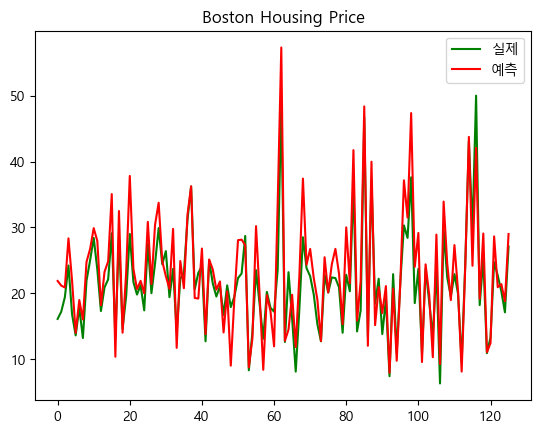

4/4 [==============================] - 0s 0s/step - loss: 2.8998 - mae: 2.8998
loss:2.900
mae: 2.900
+-----+--------+----------+-------------+
|     |   정답 |     예측 |        차이 |
|-----+--------+----------+-------------|
|   0 |   16.1 | 21.8665  |  -5.7665    |
|   1 |   17.2 | 21.1599  |  -3.95992   |
|   2 |   19.4 | 20.8722  |  -1.47221   |
|   3 |   24.2 | 28.3307  |  -4.13069   |
|   4 |   16.8 | 21.8899  |  -5.08986   |
|   5 |   13.6 | 13.9799  |  -0.379923  |
|   6 |   17.8 | 18.9669  |  -1.16691   |
|   7 |   13.2 | 16.0152  |  -2.81517   |
|   8 |   21.9 | 24.7411  |  -2.84115   |
|   9 |   25   | 26.7284  |  -1.72837   |
|  10 |   28.4 | 29.8831  |  -1.48311   |
|  11 |   23.6 | 27.929   |  -4.32901   |
|  12 |   17.3 | 18.1829  |  -0.882856  |
|  13 |   20.9 | 23.2573  |  -2.3573    |
|  14 |   22.1 | 24.8292  |  -2.72917   |
|  15 |   29.1 | 35.0591  |  -5.95909   |
|  16 |   13.3 | 10.3528  |   2.94715   |
|  17 |   28.6 | 32.4823  |  -3.88229   |
|  18 |   14.6 | 14.009

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
############################################################
# 1. 데이터 불러오기
df = pd.read_csv('./data/BostonHousing.csv')
df.dropna(axis=0, inplace=True) # 데이터 중에서 유효하지 않은 숫자 제거(NaN)
x = df.drop('medv', axis=1)  # 특성 열
y = df['medv']               # 타겟 열
############################################################
# 2. 데이터 분리하기, 표준화
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.25)
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)
############################################################
# 3. 모델 정의
model = Sequential()

model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # 최종 출력 1: 회귀 분석이므로
############################################################
# 4. 모델 학습
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
ret = model.fit(x_train, y_train, epochs=200,
                    validation_split=0.2, batch_size=64, verbose=0)
############################################################
# 5. 학습 모델 평가
df_reset = y_test.reset_index(drop=True)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
y_predict=model.predict(x_test[:]) # 예측
plt.figure()
plt.title('Boston Housing Price')
plt.plot(df_reset[:], 'g', label='실제')
plt.plot(y_predict, 'r', label='예측')
plt.legend()
plt.show()

test_loss, test_mae = model.evaluate(x_test, df_reset)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))
############################################################
# 6. 만들어진 모델로 예측하여 실제 데이터와 비교해보기
y_result = np.zeros(y_test.size)

for i in range(y_test.size):
    y_result[i]=df_reset[i] - y_predict[i][0]
raw_data = {'정답': df_reset,
            '예측': y_predict[:, 0],
            '차이': y_result}
data = DataFrame(raw_data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tabulate import tabulate
print(tabulate(data, headers='keys', tablefmt='psql', showindex=True))